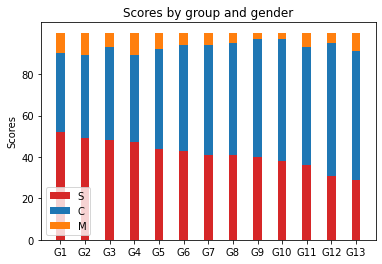

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
S = (52, 49, 48, 47, 44, 43, 41, 41, 40, 38, 36, 31, 29)
C = (38, 40, 45, 42, 48, 51, 53, 54, 57, 59, 57, 64, 62)

d = []
for i in range(0, len(S)):
    sum = S[i] + C[i]
    d.append(sum)
M = (10, 11, 7, 11, 8, 6, 6, 5, 3, 3, 7, 5, 9)
#menStd = (2, 3, 4, 1, 2)
#womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)  # the x locations for the groups
width = 0.35  # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, S, width, color='#d62728')  #, yerr=menStd)
p2 = plt.bar(ind, C, width, bottom=S)  #, yerr=womenStd)
p3 = plt.bar(ind, M, width, bottom=d)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('VT1', 'VT2', 'VT3', 'VT1', 'VT2', 'VT3', 'VT4'))
plt.yticks(np.arange(0, 50, 5))
plt.legend((p1[0], p2[0], p3[0]), ('S', 'C', 'M'))

plt.show()

[ 67.62848796  60.24951432  61.9585363   61.11226837  52.75160832
  47.12315232  46.28322031  44.0251396    0.          88.85851951
  80.30225096  87.54769137  86.51110804  70.03370372  59.88352898
  52.87759722  55.03540177   0.         123.47889943 111.12172528
 103.75727637 107.7104262   94.05675324  72.98378537  74.90706119
  70.99333614]


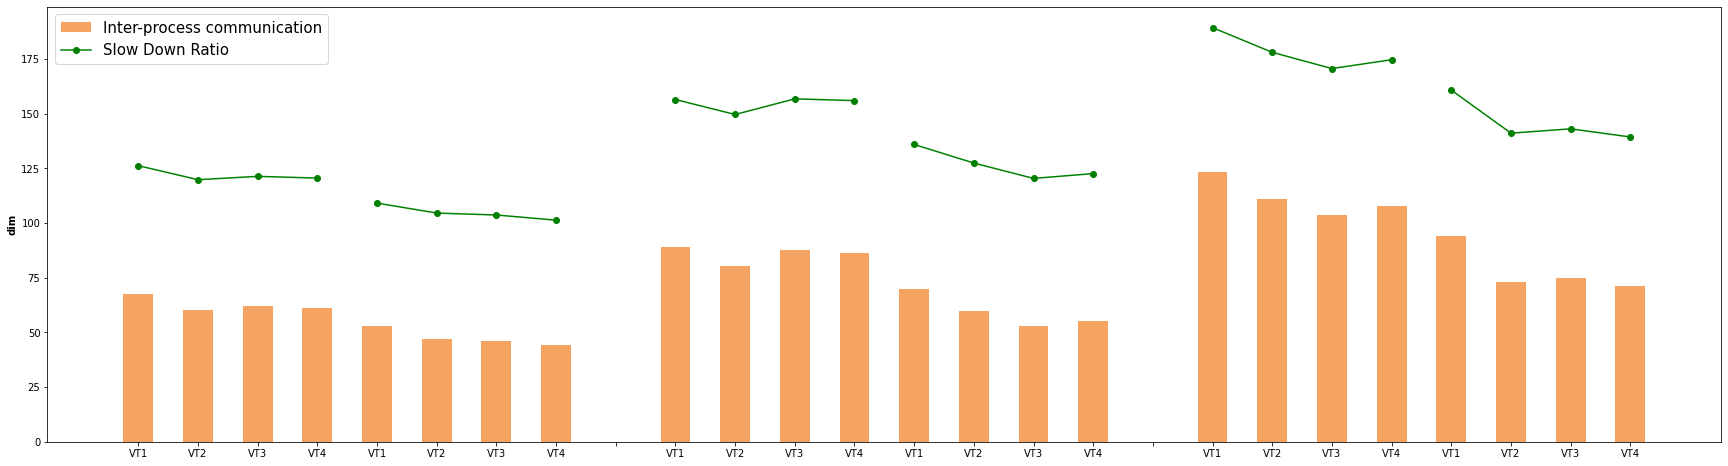

In [3]:
import pandas as pd

xls_file = pd.ExcelFile('cortical_v2_time.xlsx')
table1 = xls_file.parse('Result')

copy_before_send_800 = ()
copy_after_recving_800 = ()
compute_duration_800 = ()
import numpy as np

time_800 = np.zeros((5, 8))
time_1200 = np.zeros((5, 8))
time_1600 = np.zeros((5, 8))

index = ['VT_1', 'VT_2', 'VT_3', 'VT_4', 'VT_1+\nreorder', 'VT_2+\nreorder', 'VT_3+\nreorder', 'VT_4+\nreorder']

count = 0
for i in index:
    time_800[0][count] = table1[0:1][i][0]
    time_800[1][count] = table1[1:2][i][1]
    time_800[2][count] = table1[2:3][i][2]
    time_800[3][count] = table1[3:4][i][3]
    time_800[4][count] = table1[4:5][i][4]

    time_1200[0][count] = table1[8:9][i][8]
    time_1200[1][count] = table1[0:10][i][9]
    time_1200[2][count] = table1[10:11][i][10]
    time_1200[3][count] = table1[11:12][i][11]
    time_1200[4][count] = table1[12:13][i][12]

    time_1600[0][count] = table1[16:17][i][16]
    time_1600[1][count] = table1[17:18][i][17]
    time_1600[2][count] = table1[18:19][i][18]
    time_1600[3][count] = table1[19:20][i][19]
    time_1600[4][count] = table1[20:21][i][20]

    count += 1

import numpy as np
import matplotlib.pyplot as plt

time_800[1][1:] = time_800[1][1:] + time_800[0][1:] - time_800[0][0]
time_1200[1][1:] = time_1200[1][1:] + time_1200[0][1:] - time_1200[0][0]
time_1600[1][1:] = time_1600[1][1:] + time_1600[0][1:] - time_1600[0][0]

blank = np.zeros(1)

N = 3 * 8 + 2 * 1
ind = np.arange(N)


def concatenate_arr(time_800, blank, time_1600, time_1200):
    time_800_blank = np.append(time_800, blank)
    time_1600_blank = np.append(time_1200, blank)
    time_800_1600 = np.append(time_800_blank, time_1600_blank)
    return np.append(time_800_1600, time_1600)


communication_cost = concatenate_arr(time_800[1], blank, time_1600[1], time_1200[1])

print(communication_cost)

copy_before_send_cost = concatenate_arr(time_800[0], blank, time_1600[0], time_1200[0])
copy_after_send_cost = concatenate_arr(time_800[2], blank, time_1600[2], time_1200[2])
compute_cost = concatenate_arr(time_800[3], blank, time_1600[3], time_1200[3])

speed = concatenate_arr(time_800[4], blank, time_1600[4], time_1200[4])
width = 0.5
plt.figure(figsize=(30, 8))
p1 = plt.bar(ind, communication_cost, width, color='#F4A460')  #, yerr=menStd)

p2 = plt.plot(ind[0:4], speed[0:4], color='g', linestyle='-', marker='o')

p2_1 = plt.plot(ind[4:8], speed[4:8], color='g', linestyle='-', marker='o')

p2_2 = plt.plot(ind[9:13], speed[9:13], color='g', linestyle='-', marker='o')
p2_3 = plt.plot(ind[13:17], speed[13:17], color='g', linestyle='-', marker='o')

p2_4 = plt.plot(ind[18:22], speed[18:22], color='g', linestyle='-', marker='o')
p2_5 = plt.plot(ind[22:26], speed[22:26], color='g', linestyle='-', marker='o')
# p3 = plt.plot(ind[0:8], compute_cost[0:8], color='y', linestyle='-', marker='o')
#
# p3_1 = plt.plot(ind[10:18], compute_cost[10:18], color='y', linestyle='-', marker='o')
#
# p3_2 = plt.plot(ind[20:28], compute_cost[20:28], color='y', linestyle='-', marker='o')

# plt.ylabel('time cost', fontsize=15, fontweight='bold')
plt.ylabel("dim", fontsize=15, fontweight='bold')
# plt.xticks(ind, ('VT1', 'VT2', 'VT3', 'VT4', 'VT1', 'VT2', 'VT3', 'VT4'))
plt.xticks(ind, (
    'VT1', 'VT2', 'VT3', 'VT4', 'VT1', 'VT2', 'VT3', 'VT4', ' ', 'VT1', 'VT2', 'VT3', 'VT4', 'VT1', 'VT2', 'VT3',
    'VT4', ' ', 'VT1', 'VT2', 'VT3', 'VT4', 'VT1', 'VT2', 'VT3', 'VT4'))

plt.legend((p1[0], p2[0]),
           ('Inter-process communication', 'Slow Down Ratio'), loc='upper left',
           fontsize=15)

plt.savefig('comm_result.png', dpi=1000, transparent=True)
plt.show()


#
# # print(compute_cost)
#
# copy_cost = copy_before_send_cost + copy_after_send_cost
#
# # S = time_800[0]
# # C = time_800[1]
#
# d = []
# for i in range(0, len(communication_cost)):
#     sum = communication_cost[i] + copy_cost[i]
#     d.append(sum)
# # M = time_800[2]
#
# plt.figure(figsize=(30, 8))
# ind = np.arange(N)  # the x locations for the groups
# width = 0.5  # the width of the bars: can also be len(x) sequence
# plt.grid(axis="y")
# p1 = plt.bar(ind, communication_cost, width, color='#DCDCDC')  #, yerr=menStd)
# p2 = plt.bar(ind, copy_cost, width, bottom=communication_cost, color='#696969')  #, yerr=womenStd)
# p3 = plt.bar(ind, compute_cost, width, bottom=d, color='#000000')
#
# plt.ylabel('time cost')
# # plt.title('dim')
# plt.xticks([])
#
# plt.xticks(ind, ('VT1', 'VT2', 'VT3', 'VT4', 'VT1', 'VT2', 'VT3', 'VT4'))
# # plt.xticks(ind, (" " for i in range(N)))
# plt.yticks(np.arange(0, 210, 20))
# plt.legend((p1[0], p2[0], p3[0]),
#            ('Inter-process communication', 'copy__duration_ mean', 'compute duration mean'), loc='upper right')
#
# plt.show()

[[ 771. 1092. 1496.]
 [  58.   68.   78.]
 [  25.   29.   33.]
 [  18.   20.   22.]]


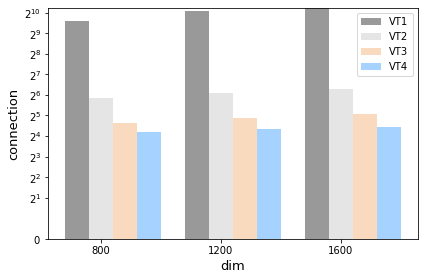

[[467.09 534.02 656.3 ]
 [ 47.46  52.37  61.  ]
 [ 23.39  27.14  31.13]
 [ 17.59  19.22  20.97]]


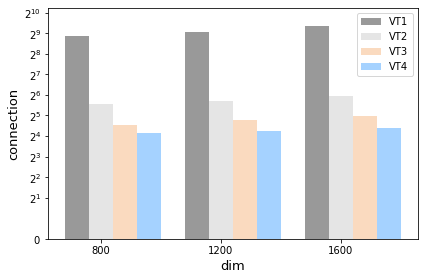

In [1]:
def concatenate_arr(time_800, blank, time_1600, time_1200):
    time_800_blank = np.append(time_800, blank)
    time_1600_blank = np.append(time_1200, blank)
    time_800_1600 = np.append(time_800_blank, time_1600_blank)
    return np.append(time_800_1600, time_1600)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def plt_conn_times(flag):
    xls_file = pd.ExcelFile('cortocal_v2_conn.xlsx')
    table1 = xls_file.parse('Result')

    time_800 = np.zeros((3, 8))
    time_1200 = np.zeros((3, 8))
    time_1600 = np.zeros((3, 8))

    index = ['VT_1', 'VT_2', 'VT_3', 'VT_4', 'VT_1+\nreorder', 'VT_2+\nreorder', 'VT_3+\nreorder', 'VT_4+\nreorder']

    count = 0
    for i in index:
        time_800[0][count] = table1[6:7][i][6]
        time_800[1][count] = table1[7:8][i][7]
        time_800[2][count] = table1[8:9][i][8]

        time_1200[0][count] = table1[18:19][i][18]
        time_1200[1][count] = table1[19:20][i][19]
        time_1200[2][count] = table1[20:21][i][20]

        time_1600[0][count] = table1[30:31][i][30]
        time_1600[1][count] = table1[31:32][i][31]
        time_1600[2][count] = table1[32:33][i][32]
        count += 1

    blank = np.zeros(2)

    bar_data = np.zeros((4, 3))
    for i in range(4):
        bar_data[i][0] = time_800[flag][0 + i]
        bar_data[i][1] = time_1200[flag][0 + i]
        bar_data[i][2] = time_1600[flag][0 + i]

    print(bar_data)
    n_groups = 3

    fig, ax = plt.subplots()

    index = np.arange(n_groups)
    bar_width = 0.2

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, bar_data[0], bar_width,
                    alpha=opacity, color='#000000',
                    error_kw=error_config,
                    label='VT1')
    rects2 = ax.bar(index + bar_width, bar_data[1], bar_width,
                    alpha=opacity, color='#C0C0C0',
                    error_kw=error_config,
                    label='VT2')
    rects3 = ax.bar(index + bar_width + bar_width, bar_data[2], bar_width,
                    alpha=opacity, color='#F4A460',
                    error_kw=error_config,
                    label='VT3')

    rects4 = ax.bar(index + bar_width + bar_width + bar_width, bar_data[3], bar_width,
                    alpha=opacity, color='#1E90FF',
                    error_kw=error_config,
                    label='VT4')

    ax.set_xticks(index + 3 * bar_width / 3)
    ax.set_xticklabels(('800', '1200', '1600'))
    ax.legend()
    plt.yscale('symlog', base=2)
    plt.ylim((0, 1200))
    plt.xlabel(u"dim", fontsize=13)
    plt.ylabel(u'connection', fontsize=13)

    fig.tight_layout()
    plt.savefig(str(flag) + '_result.png', dpi=1000)
    # plt.rcParams['savefig.dpi'] = 1000
    plt.show()


plt_conn_times(0)
plt_conn_times(2)

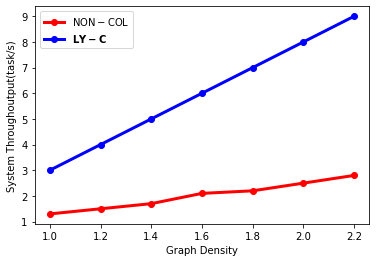

In [24]:
import matplotlib.pyplot as plt

x_data = ['1.0', '1.2', '1.4', '1.6', '1.8', '2.0', '2.2']
y_data1 = [1.3, 1.5, 1.7, 2.1, 2.2, 2.5, 2.8]
y_data2 = [3, 4, 5, 6, 7, 8, 9]
plt.plot(x_data, y_data1, color='red', linewidth=3.0, linestyle='-', marker='o')
plt.plot(x_data, y_data2, color='blue', linewidth=3.0, linestyle='-', marker='o')
plt.xlabel('Graph Density')
plt.ylabel('System Throughoutput(task/s)', )
plt.legend(
    labels=[r'$\rm{NON-COL}$', r'$\bf{LY-C}$', r'$\bf{CoopEdge}$', r'$\bf{First-stage-C}$', r'$\bf{BIECS}$'])
plt.savefig('TP-D.png', dpi=600, transparent=True)
plt.show()